# Single Factor Analysis

The single factor analysis will consist of:
* **Significant Features** - whether a single feature is significant to predict the course score
* **Significant Categories within Features** - whether there is a significant difference in course score between different groups 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
# Read linked dataset in and few first few entries
df = pd.read_csv('claims_data.csv')
# insert column 'id' at location 0 
df.insert(0,'id',np.arange(0,1338))
# set id as index
df.set_index('id',inplace=True)

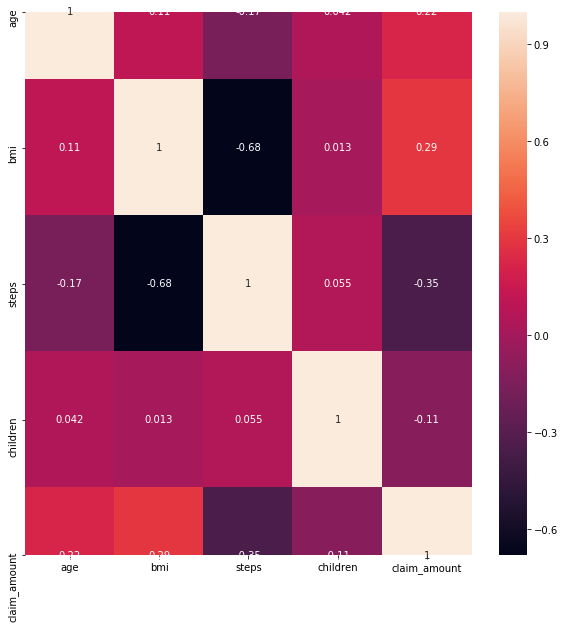

In [ ]:
# Create figure and axes
f, a = plt.subplots(figsize = (10,10))

# Create heatmap of correlations
sns.heatmap(data=df.corr(), annot=True)

In [ ]:
# Lables
y = df['claim_amount']

# Features
X = df.drop(['claim_amount', 'insurance_claim'], axis=1)

All input data for computing purposes needs to be numbers. We therefore have to transfrom the text data into numbers before we can test for significance. 

For that we use a pandas method called `get_dummies`. The text data are categorial variables. `get_dummies` will transform all the categorical text data into numbers. It will store the values as 0's and 1's by creating n columns for each variable with n categories.

In [ ]:
X = pd.get_dummies(X)

## Significant Features

In the first part of our single factor analysis we will identify the features that are significant in predicting the course score. Each factor will be considered in isolation (i.e. only one feature used to predict). 

This technique is known as the **Hypothesis Test for the Regression Slope** and work as follows:

**STEP 1:** 

Using simple linear regression, find the slope ($\beta$) in the equation: 

$$ y = \alpha + \beta x$$ 

Where $y$ is the dependent variable (course score), $x$ is the independent variable (single feature to test) and $\alpha$ is  the intercept.
    


**STEP 2:**

Perform a hypothesis test to find if $\beta$ is different from zero:

$$H_0: \beta = 0$$
$$H_1: \beta \neq 0$$

The null hypothesis states that the slope is equal to zero, while the alternative hypothesis states that it is not equal to zero. If we find that the slope of the regression line is significantly different from zero, we will conclude that there is a significant relationship between the independent and dependent variables. We will make our conclusion by looking at the p-value of the test statistic.

----------------------------------------------------------------------------

Let's try this with our data. We need to import the `api` module from the `statsmodels` library - which we will use to perform both of the above mentioned steps.

In [ ]:
import statsmodels.api as sm

*STEP 1* will be performed using the `OLS` class, which stands for ordinary least squares (an optimisation method for simple linear regression). We then fit the model by applying the `fit()` method on the instance of our class. This will create estimates for the intercept and slope.

In [ ]:
# Create linear fit - input dependent and independent variables in the OLS class
regression = sm.OLS(y, sm.add_constant(X[['sex_female']])).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
# Get coefficient/slope of "age"
regression.params[1]

-2155.033184331628

We can see that the slope is -2155.03 but is that significant?To test that we perform STEP 2 -the hypothesis test.

To quickly refresh our memories about hypothesis testing: We must calculate a test statistic under the null hypothesis and then calculate the p-value. If the p-value is lower than a significance level  a  then we reject the null hypothesis in favour of the alternative hypothesis at that level. For this tutorial our tests will focus on a significance level of 5%.

In [ ]:
regression.tvalues[1]

-2.9384766541516134

The test statistic is -2.938, but we have to calculate the p-value to find out if this is significant. The p-value is calculated by using the pvalue method on the "regression" variable.

In [ ]:
regression.pvalues[1]

0.003354912845977785

The p-value is 0.34%, which is significant at a significance level of 5%.

# Test all variables one-by-one
Going through the process above for each feature gets quite tedious when we have many features. So let's write a for loop to repeat the process for all of our features in our recruitment dataset and then add all of the information in a pandas dataframe.

In [ ]:
# Use all column names
X.columns

Index(['age', 'bmi', 'steps', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
# Create a list of the feature names - which will be used in our final dataframe
feature_names =['age', 'bmi', 'steps', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']
# Create a empty list g, which will be appended with information of each feature
g = []

# For loop to do the following for all features:
# 1) fit the regression line
# 2) calculate parameters, test statistic and p-value
# 3) add 2) to a list
for column in X:
    regression = sm.OLS(y, sm.add_constant(X[[column]])).fit()
    regression_params = regression.params[1]
    regression_tvalues = regression.tvalues[1]
    regression_pvalues = regression.pvalues[1]
    
    g.append([regression_params, regression_tvalues, regression_pvalues])

# Create dataframe with coefficient, t statistc and p-value per feature and sort by p-value
g = pd.DataFrame(data=np.array(g).reshape(12,3), index=feature_names, columns=['Coefficient', 't statistic', 'p value'])
g.sort_values(by='p value')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

,Coefficient,t statistic,p value
smoker_yes,25963.419205,45.446283,2.195106e-273
smoker_no,-25963.419205,-45.446283,2.195106e-273
steps,-1.901539,-13.518104,4.021506e-39
bmi,646.265883,11.201184,6.736611e-28
age,209.526466,8.198486,5.652688e-16
children,-1211.244623,-3.991456,6.923796e-05
region_southeast,3192.341028,3.883687,1.079156e-04
sex_male,2155.033184,2.938477,3.354913e-03
sex_female,-2155.033184,-2.938477,3.354913e-03
region_northwest,-2370.553825,-2.771457,5.658030e-03
